<a href="https://colab.research.google.com/github/hadiprasetiyo/twitter-sentiment-analysis-willow-project/blob/master/Twitter_Sentiment_Analysis_Willow_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Library

In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-16wydf2m
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-16wydf2m
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev39+gc3b216c-py3-none-any.whl size=73725 sha256=d800c3f3e955983f2f874cf33f3bac16d78a546325ed2a5e23fc80928d3b2966
  Stored in directory: /tmp/pip-ephem-wheel-cache-c8_eamqj/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import snscrape.modules. twitter as sntwitter
import re
from textblob import TextBlob
from translate import Translator
import numpy as np
import matplotlib.pyplot as plt

## Scrapping TWT Data

In [ ]:
hasilSearch = sntwitter.TwitterSearchScraper("#willowproject")

##### StopWords

In [ ]:
translator = Translator(to_lang="en", from_lang="id")
tweet_properties_list = []

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_properties = {}
    tweet_properties['tanggal_tweet'] = tweet.date
    tweet_properties['pengguna'] = tweet.user.username
    tweet_properties['isi_tweet'] = tweet.content
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())

    # translated_text = translator.translate(tweet_bersih)

    analysis = TextBlob(tweet_bersih)

    tweet_properties['sentiment'] = 'positive' if analysis.sentiment.polarity > 0.0 else 'negative'


    if tweet.retweetCount > 0:
      if tweet_properties not in tweet_properties_list:
        tweet_properties_list.append(tweet_properties)
    else:
      tweet_properties_list.append(tweet_properties)

    if i == 499:
        break


<ipython-input-6-bb4f7c61d8a8>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_properties['isi_tweet'] = tweet.content
<ipython-input-6-bb4f7c61d8a8>:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())


##### Columning

In [ ]:
tweet_data = []

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_list=[tweet.date, tweet.user.username, tweet.content]
    tweet_data.append(tweet_list)
    if i == 500 :
        break

<ipython-input-7-1c1f5f208f1b>:4: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_list=[tweet.date, tweet.user.username, tweet.content]


In [ ]:
tweet_data

[[datetime.datetime(2023, 6, 9, 12, 53, 53, tzinfo=datetime.timezone.utc),
  'JoaoVic39549655',
  '@MarkRuffalo take care of your domestic problems first my friend. How is the willow project going?'],
 [datetime.datetime(2023, 6, 9, 12, 51, 33, tzinfo=datetime.timezone.utc),
  'rosie_in_autume',
  '@AIreneAdler Then do at the same standard. Let talk bad to the cheaters whoever they are. If your standard is ran’s fan because they started first so ai’s fans is not wrong anymore because they started later?? I don’t support the cheaters even from my side because that is wrong and always be.'],
 [datetime.datetime(2023, 6, 9, 12, 49, 45, tzinfo=datetime.timezone.utc),
  'ellarenegado',
  'Yawa manis Biden oy, unsa naman pod ng willow project niya'],
 [datetime.datetime(2023, 6, 9, 12, 43, 28, tzinfo=datetime.timezone.utc),
  'rosie_in_autume',
  'คนที่เขาคิดว่าวุ่นวายคือเจ้าของร่างกายเขาค่ะ จะแปะป้ายหรือไม่เรื่องของเขาเพราะการจะถือว่าเรื่องวุ่นวายหรือไม่ก็คือเรื่องของเขา ถ้าเขาไม่อยากแปะป้า

In [ ]:
tweet_df= pd.DataFrame(tweet_data, columns=['date', 'user','tweet'])


In [ ]:
tweet_df

,date,user,tweet
0,2023-06-09 12:53:53+00:00,JoaoVic39549655,@MarkRuffalo take care of your domestic proble...
1,2023-06-09 12:51:33+00:00,rosie_in_autume,@AIreneAdler Then do at the same standard. Let...
2,2023-06-09 12:49:45+00:00,ellarenegado,"Yawa manis Biden oy, unsa naman pod ng willow ..."
3,2023-06-09 12:43:28+00:00,rosie_in_autume,คนที่เขาคิดว่าวุ่นวายคือเจ้าของร่างกายเขาค่ะ จ...
4,2023-06-09 12:38:15+00:00,TWillowProject,This is a really interesting article about how...
...,...,...,...
496,2023-06-02 13:08:38+00:00,rosie_in_autume,หวั่น(ผู้ชายทำร้าย)ผู้หญิงดื่มเหล้ามากขึ้น
497,2023-06-02 13:34:58+00:00,misafrancoO,@TommyInPA @Politics_Polls @YouGovAmerica @Yah...
498,2023-06-02 13:36:53+00:00,tobosbunny,You're happily letting this happen along with ...
499,2023-06-02 11:09:36+00:00,gigiviguier52,Les USA ne peuvent pas doubler leur pollution ...


##### Labelling

In [ ]:
tweet_positif = [t for t in tweet_properties_list if t['sentiment'] == 'positive']
tweet_negatif = [t for t in tweet_properties_list if t['sentiment'] == 'negative']

In [ ]:
print(f"""Hasil Sentimen
Positif : {len(tweet_positif)}
Negatif : {len(tweet_negatif)}
""")

Hasil Sentimen
Positif : 149
Negatif : 351



In [ ]:
print(tweet_properties_list)

[{'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 53, 53, tzinfo=datetime.timezone.utc), 'pengguna': 'JoaoVic39549655', 'isi_tweet': '@MarkRuffalo take care of your domestic problems first my friend. How is the willow project going?', 'sentiment': 'positive'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 51, 33, tzinfo=datetime.timezone.utc), 'pengguna': 'rosie_in_autume', 'isi_tweet': '@AIreneAdler Then do at the same standard. Let talk bad to the cheaters whoever they are. If your standard is ran’s fan because they started first so ai’s fans is not wrong anymore because they started later?? I don’t support the cheaters even from my side because that is wrong and always be.', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 49, 45, tzinfo=datetime.timezone.utc), 'pengguna': 'ellarenegado', 'isi_tweet': 'Yawa manis Biden oy, unsa naman pod ng willow project niya', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 43, 28

In [ ]:
tweet_df = pd.DataFrame.from_records(tweet_properties_list, columns=['tanggal_tweet', 'pengguna', 'isi_tweet', 'sentiment'])

In [ ]:
tweet_df


,tanggal_tweet,pengguna,isi_tweet,sentiment
0,2023-06-09 12:53:53+00:00,JoaoVic39549655,@MarkRuffalo take care of your domestic proble...,positive
1,2023-06-09 12:51:33+00:00,rosie_in_autume,@AIreneAdler Then do at the same standard. Let...,negative
2,2023-06-09 12:49:45+00:00,ellarenegado,"Yawa manis Biden oy, unsa naman pod ng willow ...",negative
3,2023-06-09 12:43:28+00:00,rosie_in_autume,คนที่เขาคิดว่าวุ่นวายคือเจ้าของร่างกายเขาค่ะ จ...,negative
4,2023-06-09 12:38:15+00:00,TWillowProject,This is a really interesting article about how...,positive
...,...,...,...,...
495,2023-06-02 13:43:56+00:00,TommyInPA,@misafrancoO @Politics_Polls @YouGovAmerica @Y...,positive
496,2023-06-02 13:08:38+00:00,rosie_in_autume,หวั่น(ผู้ชายทำร้าย)ผู้หญิงดื่มเหล้ามากขึ้น,negative
497,2023-06-02 13:34:58+00:00,misafrancoO,@TommyInPA @Politics_Polls @YouGovAmerica @Yah...,negative
498,2023-06-02 13:36:53+00:00,tobosbunny,You're happily letting this happen along with ...,negative


In [ ]:
df = tweet_df

### Cleaning

In [ ]:
import nltk

import requests
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl gt https sm plg skrg
'''

modified_stopwords_l = stopwords_l.copy()

# create dictionary with unique stopword
st_words = set(modified_stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stopwords: ['tentu', 'diduga', 'dibuat', 'sedikit', 'menurut']


#### text cleaning

In [ ]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove "https"
    text = re.sub(r'https', '', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for char in text.lower():
        if char in punctuations:
            text = text.replace(char, " ")

    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

##### Positive Words

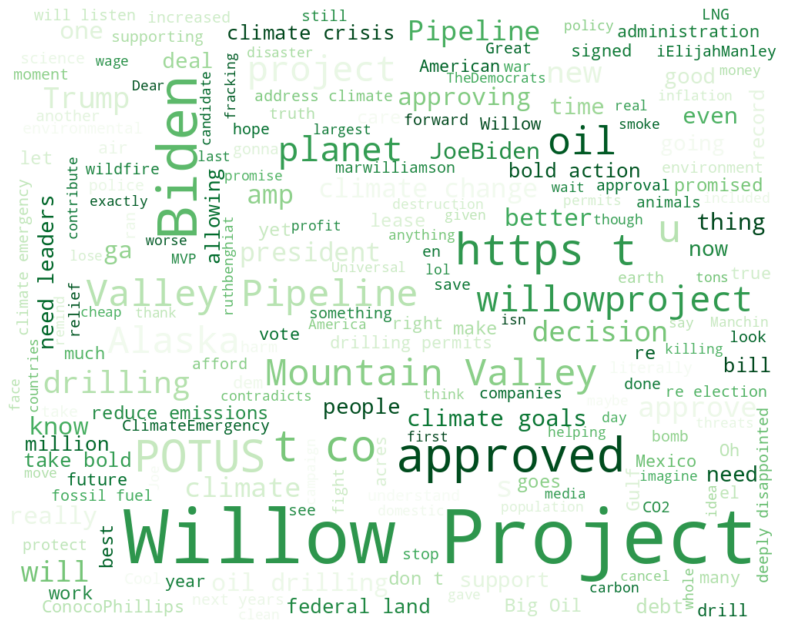

In [ ]:
from wordcloud import WordCloud

# wordcloud tweet sentiment positive
data_pos = df[df['sentiment'] == 'positive']

all_text = ' '.join(word for word in data_pos['isi_tweet'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Negative Words

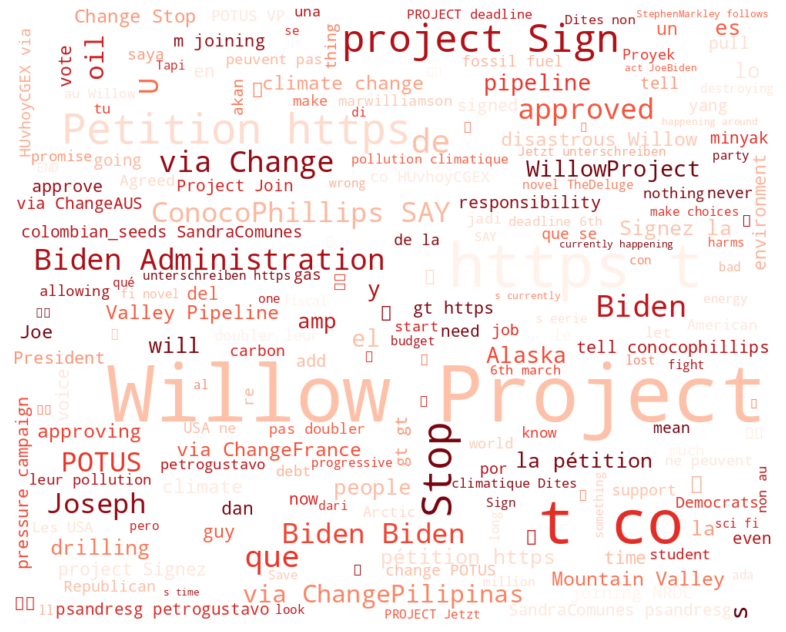

In [ ]:
# wordcloud tweet sentiment negative
data_neg = df[df['sentiment'] == 'negative']

all_text = ' '.join(word for word in data_neg['isi_tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
df.describe()

<ipython-input-22-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,tanggal_tweet,pengguna,isi_tweet,sentiment
count,500,500,500,500
unique,500,340,478,2
top,2023-06-09 12:53:53+00:00,rosie_in_autume,Joseph R. Biden: Biden Administration and Cono...,negative
freq,1,37,7,351
first,2023-06-02 11:09:36+00:00,NaN,NaN,NaN
last,2023-06-09 12:53:53+00:00,NaN,NaN,NaN


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 16.0 MB/s eta 0:00:00


In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [ ]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [ ]:
# implement preprocessing
preprocessed_data = df.copy()
preprocessed_data['Text Tweet'] = df['isi_tweet'].map(preprocess)

In [ ]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['isi_tweet']
y = preprocessed_data['sentiment']

X.head()

0    @MarkRuffalo take care of your domestic proble...
1    @AIreneAdler Then do at the same standard. Let...
2    Yawa manis Biden oy, unsa naman pod ng willow ...
3    คนที่เขาคิดว่าวุ่นวายคือเจ้าของร่างกายเขาค่ะ จ...
4    This is a really interesting article about how...
Name: isi_tweet, dtype: object

In [ ]:
# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})
y.head()

0    1
1    0
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((450,), (450,), (50,), (50,))

In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 298


In [ ]:
def extract_features(tweet, freqs):
    '''
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in tweet:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)

    assert(x.shape == (1, 3))
    return x

In [ ]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[0], freqs)

print(f'text: {train_x.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text: @suenosdeuomi @RodneyDMickens @SocialistMMA And democrats just opened up the Willow Project Alaska LNG and 620 million acres of federal coastal waters and land opened up for fossil fuel extraction... who needs republicans to wreck the environment 🤦‍♂️🤷‍♂️
feature extraction result: [[1.00000e+00 4.42346e+05 6.29039e+05]]


In [ ]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[1.00000e+00, 4.42346e+05, 6.29039e+05],
       [1.00000e+00, 5.43514e+05, 7.74122e+05],
       [1.00000e+00, 5.68924e+05, 8.09360e+05],
       [1.00000e+00, 0.00000e+00, 4.61400e+03],
       [1.00000e+00, 5.60845e+05, 8.03584e+05]])

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x.to_numpy()[i], freqs)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, train_y)


RandomForestClassifier()

In [ ]:
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(test_y,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_test, test_y) * 100, 2)


cm = confusion_matrix(test_y, Y_prediction)
accuracy = accuracy_score(test_y,Y_prediction)
precision =precision_score(test_y, Y_prediction,average='micro')
recall =  recall_score(test_y, Y_prediction,average='micro')
f1 = f1_score(test_y,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[29  6]
 [ 6  9]]
accuracy_random_Forest : 0.760
precision_random_Forest : 0.760
recall_random_Forest : 0.760
f1-score_random_Forest : 0.760
